In [1]:
import pandas as pd
import numpy as np
import difflib 

In [2]:
df=pd.read_excel('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/final_project/data/February 2022 Raw Database.xlsx', sheet_name='MASTER')
df=df.iloc[:, 0:26].copy()

In [3]:
station=pd.read_excel('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/final_project/data/2018-APTA-Infrastructure-Database.xlsx', sheet_name='Station Data')

In [4]:
station= station.drop_duplicates(subset=['Organization Name'], keep='first')

In [5]:
upt=pd.read_excel('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/final_project/data/February 2022 Raw Database.xlsx', sheet_name='UPT', usecols=['Agency', 'JAN18', 'FEB18', 'MAR18','APR18','MAY18', 'JUN18','JUL18','AUG18', 'SEP18','OCT18', 'NOV18', 'DEC18', 'Modes'])
master=pd.read_excel('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/final_project/data/February 2022 Raw Database.xlsx', sheet_name='MASTER', usecols=['Agency','UZA Area SQ Miles','UZA Population'])
upt['avg2018'] = upt[['JAN18','FEB18','MAR18','APR18','MAY18','JUN18','JUL18','AUG18','SEP18','OCT18','NOV18','DEC18']].mean(axis=1)
upt=upt.iloc[:,[0,-1]]

/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [6]:
upt=pd.merge(upt,master, how="left", on=["Agency"])
upt['ridesPerPop']=upt['avg2018']/upt['UZA Population']
upt['ridesPerArea']=upt['avg2018']/upt['UZA Area SQ Miles']
upt['ridesPerDensity']=upt['avg2018']/(upt['UZA Population']/upt['UZA Area SQ Miles'])
upt

,Agency,avg2018,UZA Area SQ Miles,UZA Population,ridesPerPop,ridesPerArea,ridesPerDensity
0,King County Department of Metro Transit,7.360933e+04,1010.0,3059393.0,0.02406,72.880528,24.300712
1,King County Department of Metro Transit,7.360933e+04,1010.0,3059393.0,0.02406,72.880528,24.300712
2,King County Department of Metro Transit,7.360933e+04,1010.0,3059393.0,0.02406,72.880528,24.300712
3,King County Department of Metro Transit,7.360933e+04,1010.0,3059393.0,0.02406,72.880528,24.300712
4,King County Department of Metro Transit,7.360933e+04,1010.0,3059393.0,0.02406,72.880528,24.300712
...,...,...,...,...,...,...,...
8800,NaN,9.693779e+09,NaN,NaN,NaN,NaN,NaN
8801,NaN,8.499215e+07,NaN,NaN,NaN,NaN,NaN
8802,NaN,9.778771e+09,NaN,NaN,NaN,NaN,NaN
8803,NaN,1.308696e+08,NaN,NaN,NaN,NaN,NaN


In [34]:
#Pulling in all potentially comforts including accessibility and wifi and so on
comforts=station.iloc[:,-29:]
#pulling in city and state
comforts['Organization Name']=station['Organization Name']
# Bringing in Station Counts and normalizing comforts
comforts['stationCount']=station.iloc[:,9]
comforts.head()


,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,Number of Stations with Concessions,Number of Stations with Restrooms,Number of Stations with Official Day Care Facilities,Number of Bus/Rail Stops,Number of Bus/Rail Stops with Shelters,Number of Bus/Rail Stops with Benches,Number of Bus/Rail Stops with Lighting,...,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,Organization Name,stationCount
0,6,15,0.0,0,2,0,3994,2552.0,813.0,2552.0,...,NaN,0.0,14.0,15.0,4.0,1.0,NaN,0.0,City of Phoenix Public Transit Department,15
2,3,3,NaN,0,8,0,2291,882.0,595.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,City of Tucson Mass Transit System,23
3,0,1,0.0,0,1,0,1548,142.0,40.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Region METRO,1
5,0,0,0.0,0,0,0,5291,694.0,1420.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alameda-Contra Costa Transit District,0
6,0,0,0.0,0,2,0,420,119.0,155.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Culver City Municipal Bus Lines,3


# Normalizing Comforts by number of stops

In [15]:
comforts.columns

Index(['Number of Stations with Video Displays',
       'Number of Stations with Security Cameras',
       'Number of Stations with Emergency Call Buttons',
       'Number of Stations with Concessions',
       'Number of Stations with Restrooms',
       'Number of Stations with Official Day Care Facilities',
       'Number of Bus/Rail Stops', 'Number of Bus/Rail Stops with Shelters',
       'Number of Bus/Rail Stops with Benches',
       'Number of Bus/Rail Stops with Lighting',
       'Number of Bus/Rail Stops with Video Displays',
       'Number of bus/rail stops with auto lot', 'Number of Elevators',
       'Number of Escalators', 'Number of Faregates/Turnstiles',
       'Number of Fare Media Vending Machines',
       'Number of All-day Parking Spaces', 'Number of Part-day Parking Spaces',
       'Number of Bicycle Rack Spaces',
       'Number of Motorcycle/Moped Parking Spaces',
       'Number of Bus/Rail Stops without Shelters', 'Stopnoben',
       'Number of bicycle spaces in sec

In [37]:
# normalizing by station counts
#all creature comforts divided by number of Bus/Rail stops unless explicitly mentions word stations
#elevetars , escalators, turnstiles also divide by stations 

comforts['Number of Stations with Video Displays']=comforts['Number of Stations with Video Displays']/comforts['stationCount']
comforts['Number of Stations with Video Displays']=comforts['Number of Stations with Video Displays'].fillna(0)

comforts['Number of Stations with Security Cameras']=comforts['Number of Stations with Security Cameras']/comforts['stationCount']
comforts['Number of Stations with Security Cameras']=comforts['Number of Stations with Security Cameras'].fillna(0)

comforts['Number of Stations with Emergency Call Buttons']=comforts['Number of Stations with Emergency Call Buttons']/comforts['stationCount']
comforts['Number of Stations with Emergency Call Buttons']=comforts['Number of Stations with Emergency Call Buttons'].fillna(0)

comforts['Number of Stations with Concessions']=comforts['Number of Stations with Concessions']/comforts['stationCount']
comforts['Number of Stations with Concessions']=comforts['Number of Stations with Concessions'].fillna(0)

comforts['Number of Stations with Restrooms']=comforts['Number of Stations with Restrooms']/comforts['stationCount']
comforts['Number of Stations with Restrooms']=comforts['Number of Stations with Restrooms'].fillna(0)

comforts['Number of Stations with Official Day Care Facilities']=comforts['Number of Stations with Official Day Care Facilities']/comforts['stationCount']
comforts['Number of Stations with Official Day Care Facilities']=comforts['Number of Stations with Official Day Care Facilities'].fillna(0)

comforts['Number of Elevators']=comforts['Number of Elevators']/comforts['stationCount']
comforts['Number of Elevators']=comforts['Number of Elevators'].fillna(0)

comforts['Number of Escalators']=comforts['Number of Escalators']/comforts['stationCount']
comforts['Number of Escalators']=comforts['Number of Escalators'].fillna(0)

comforts['Number of Faregates/Turnstiles']=comforts['Number of Faregates/Turnstiles']/comforts['stationCount']
comforts['Number of Faregates/Turnstiles']=comforts['Number of Faregates/Turnstiles'].fillna(0)

comforts['Number of stations with all-day auto parking']=comforts['Number of stations with all-day auto parking']/comforts['stationCount']
comforts['Number of stations with all-day auto parking']=comforts['Number of stations with all-day auto parking'].fillna(0)

comforts['Number of stations with lockers or secure bike facility']=comforts['Number of stations with lockers or secure bike facility']/comforts['stationCount']
comforts['Number of stations with lockers or secure bike facility']=comforts['Number of stations with lockers or secure bike facility'].fillna(0)

comforts['Number of stations with bike racks']=comforts['Number of stations with bike racks']/comforts['stationCount']
comforts['Number of stations with bike racks']=comforts['Number of stations with bike racks'].fillna(0)

comforts['Station with Nearby Bikeshare Docks']=comforts['Station with Nearby Bikeshare Docks']/comforts['stationCount']
comforts['Station with Nearby Bikeshare Docks']=comforts['Station with Nearby Bikeshare Docks'].fillna(0)

comforts['Number of Stations with Elecric Vehcile Charging Outlets']=comforts['Number of Stations with Elecric Vehcile Charging Outlets']/comforts['stationCount']
comforts['Number of Stations with Elecric Vehcile Charging Outlets']=comforts['Number of Stations with Elecric Vehcile Charging Outlets'].fillna(0)

comforts['Number of stations with WiFi access']=comforts['Number of stations with WiFi access']/comforts['stationCount']
comforts['Number of stations with WiFi access']=comforts['Number of stations with WiFi access'].fillna(0)


# normalizing by bus stop counts
comforts['Number of Bus/Rail Stops with Shelters']=comforts['Number of Bus/Rail Stops with Shelters']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bus/Rail Stops with Shelters']=comforts['Number of Bus/Rail Stops with Shelters'].fillna(0)

comforts['Number of Bus/Rail Stops with Benches']=comforts['Number of Bus/Rail Stops with Benches']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bus/Rail Stops with Benches']=comforts['Number of Bus/Rail Stops with Benches'].fillna(0)

comforts['Number of Bus/Rail Stops with Lighting']=comforts['Number of Bus/Rail Stops with Lighting']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bus/Rail Stops with Lighting']=comforts['Number of Bus/Rail Stops with Lighting'].fillna(0)

comforts['Number of Bus/Rail Stops with Video Displays']=comforts['Number of Bus/Rail Stops with Video Displays']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bus/Rail Stops with Video Displays']=comforts['Number of Bus/Rail Stops with Video Displays'].fillna(0)

comforts['Number of bus/rail stops with auto lot']=comforts['Number of bus/rail stops with auto lot']/comforts['Number of Bus/Rail Stops']
comforts['Number of bus/rail stops with auto lot']=comforts['Number of bus/rail stops with auto lot'].fillna(0)

comforts['Number of Fare Media Vending Machines']=comforts['Number of Fare Media Vending Machines']/comforts['Number of Bus/Rail Stops']
comforts['Number of Fare Media Vending Machines']=comforts['Number of Fare Media Vending Machines'].fillna(0)

comforts['Number of All-day Parking Spaces']=comforts['Number of All-day Parking Spaces']/comforts['Number of Bus/Rail Stops']
comforts['Number of All-day Parking Spaces']=comforts['Number of All-day Parking Spaces'].fillna(0)

comforts['Number of Part-day Parking Spaces']=comforts['Number of Part-day Parking Spaces']/comforts['Number of Bus/Rail Stops']
comforts['Number of Part-day Parking Spaces']=comforts['Number of Part-day Parking Spaces'].fillna(0)

comforts['Number of Bicycle Rack Spaces']=comforts['Number of Bicycle Rack Spaces']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bicycle Rack Spaces']=comforts['Number of Bicycle Rack Spaces'].fillna(0)

comforts['Number of Motorcycle/Moped Parking Spaces']=comforts['Number of Motorcycle/Moped Parking Spaces']/comforts['Number of Bus/Rail Stops']
comforts['Number of Motorcycle/Moped Parking Spaces']=comforts['Number of Motorcycle/Moped Parking Spaces'].fillna(0)

comforts['Number of Bus/Rail Stops without Shelters']=comforts['Number of Bus/Rail Stops without Shelters']/comforts['Number of Bus/Rail Stops']
comforts['Number of Bus/Rail Stops without Shelters']=comforts['Number of Bus/Rail Stops without Shelters'].fillna(0)

comforts['Stopnoben']=comforts['Stopnoben']/comforts['Number of Bus/Rail Stops']
comforts['Stopnoben']=comforts['Stopnoben'].fillna(0)

comforts['Number of bicycle spaces in secure facilities - locker/facility']=comforts['Number of bicycle spaces in secure facilities - locker/facility']/comforts['Number of Bus/Rail Stops']
comforts['Number of bicycle spaces in secure facilities - locker/facility']=comforts['Number of bicycle spaces in secure facilities - locker/facility'].fillna(0)


#droping station and stop counts
comforts=comforts.drop(['Number of Bus/Rail Stops', 'stationCount'], axis=1)
comforts

,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,Number of Stations with Concessions,Number of Stations with Restrooms,Number of Stations with Official Day Care Facilities,Number of Bus/Rail Stops with Shelters,Number of Bus/Rail Stops with Benches,Number of Bus/Rail Stops with Lighting,Number of Bus/Rail Stops with Video Displays,...,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,Organization Name
0,0.026667,1.000000,0.0,0.0,0.133333,0.0,0.638958,0.203555,0.638958,0.000000,...,0.000000,0.0,0.000,0.933333,1.0,0.266667,0.066667,0.0,0.0,City of Phoenix Public Transit Department
2,0.005671,0.130435,0.0,0.0,0.347826,0.0,0.384985,0.259712,0.097774,0.000000,...,0.796595,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,City of Tucson Mass Transit System
3,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.091731,0.025840,0.000000,0.000000,...,1.162791,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,Rock Region METRO
5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.131166,0.268380,0.000000,0.022680,...,1.162351,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,Alameda-Contra Costa Transit District
6,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.283333,0.369048,0.000000,0.000000,...,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,Culver City Municipal Bus Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.175000,0.400000,0.325000,0.275000,...,0.000000,0.0,0.000,0.000000,0.0,1.000000,0.000000,0.0,0.0,Bow Valley Regional Transit Services Commission
497,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.040000,0.040000,0.026667,0.000000,...,0.000000,0.0,0.000,1.000000,0.0,1.000000,0.000000,0.0,0.0,Link Transit (City of Burlington NC)
498,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,University of California San Francisco
499,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.187500,0.625000,0.000000,0.000000,...,0.000000,0.0,0.025,1.000000,1.0,1.000000,0.000000,0.0,0.0,Strathcona County Transit


In [38]:
#Making it so one organization name is only one row in ridership data
uptCopy=upt
uptCopy=uptCopy.groupby(['Agency']).sum()
uptCopy
uptCopy=uptCopy.reset_index(level=0)
uptCopy

,Agency,avg2018,UZA Area SQ Miles,UZA Population,ridesPerPop,ridesPerArea,ridesPerDensity
0,"2Plus Partners in Transportation, Inc",0.000000,465.0,888890.0,0.000000,0.000000,0.000000
1,ATC / Vancom,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,"Academy Lines, Inc.",546977.166667,13800.0,73405180.0,0.029806,158.544106,102.830412
3,Access Services,184299.333333,1736.0,12150996.0,0.015167,106.163210,26.330652
4,Access Services,182954.083333,1736.0,12150996.0,0.015057,105.388297,26.138457
...,...,...,...,...,...,...,...
804,"vRide, Inc. - Anchorage",0.000000,85.0,251243.0,0.000000,0.000000,0.000000
805,"vRide, Inc. - Atlanta",0.000000,2645.0,4515419.0,0.000000,0.000000,0.000000
806,"vRide, Inc. - El Paso",0.000000,0.0,0.0,0.000000,0.000000,0.000000
807,"vRide, Inc. - Tucson",0.000000,353.0,843168.0,0.000000,0.000000,0.000000


In [39]:
#Making it so one organization name is only one row in comforts data
comforts=comforts.groupby('Organization Name').sum()
comforts=comforts.reset_index(level=0)
uptCopy=uptCopy.iloc[:,[0,1,4,5,6]]
uptCopy.columns=['Organization Name','avg2018','ridesPerPop','ridesPerArea','ridesPerDensity']
uptCopy

,Organization Name,avg2018,ridesPerPop,ridesPerArea,ridesPerDensity
0,"2Plus Partners in Transportation, Inc",0.000000,0.000000,0.000000,0.000000
1,ATC / Vancom,0.000000,0.000000,0.000000,0.000000
2,"Academy Lines, Inc.",546977.166667,0.029806,158.544106,102.830412
3,Access Services,184299.333333,0.015167,106.163210,26.330652
4,Access Services,182954.083333,0.015057,105.388297,26.138457
...,...,...,...,...,...
804,"vRide, Inc. - Anchorage",0.000000,0.000000,0.000000,0.000000
805,"vRide, Inc. - Atlanta",0.000000,0.000000,0.000000,0.000000
806,"vRide, Inc. - El Paso",0.000000,0.000000,0.000000,0.000000
807,"vRide, Inc. - Tucson",0.000000,0.000000,0.000000,0.000000


# Fuzzy matching organion name

In [41]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


# empty lists for storing the matches 
# later
mat1 = []
mat2 = []
p = []
  
dframe1=uptCopy
dframe2=comforts
  
# converting dataframe column to 
# list of elements
# to do fuzzy matching
list1 = dframe1['Organization Name'].tolist()
list2 = dframe2['Organization Name'].tolist()
newList1=[]
for i in list1:
    i=i.lower()
    i=i.lstrip()
    i=i.rstrip()
    i=i.replace("city", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("transportation", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("transit", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("metro","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("public","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("system","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("authority","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("mass","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("area","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("greater","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("county","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("of","")
    i=i.replace("and","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace(","," ")
    i=i.replace(".","")
    i=i.rstrip()
    i=i.replace("-"," ")
    i=i.lstrip()
    i=i.replace("    "," ")
    i=i.replace("   "," ")
    i=i.replace("  ","")
    i=i.rstrip()
    newList1.append(i)
list1=newList1
newList2=[]
for i in list2:
    i=i.lower()
    i=i.lstrip()
    i=i.rstrip()
    i=i.replace("city", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("transportation", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("transit", "")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("metro","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("public","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("system","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("authority","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("mass","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("area","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("greater","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("county","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace("of","")
    i=i.replace("and","")
    i=i.rstrip()
    i=i.lstrip()
    i=i.replace(","," ")
    i=i.replace(".","")
    i=i.rstrip()
    i=i.replace("-"," ")
    i=i.lstrip()
    i=i.replace("    "," ")
    i=i.replace("   "," ")
    i=i.replace("  ","")
    i=i.rstrip()
    newList2.append(i)
newList2
list2=newList2

# taking the threshold as 10
threshold = 80
  
# iterating through list1 to extract 
# it's closest match from list2
for i in list1:
    mat1.append(process.extractOne(i, list2, scorer=fuzz.ratio))
dframe1['matches'] = mat1
  
# iterating through the closest matches
# to filter out the maximum closest match
for j in dframe1['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []
  
  
# storing the resultant matches back to dframe1
dframe1['matches'] = mat2



/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
<ipython-input-41-3439e90f88e1>:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe1['matches'] = mat1
<ipython-input-41-3439e90f88e1>:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe1['matches'] = ma

# MFlynn Method

In [44]:
uptCopy

,Organization Name,avg2018,ridesPerPop,ridesPerArea,ridesPerDensity,matches
0,"2Plus Partners in Transportation, Inc",0.000000,0.000000,0.000000,0.000000,
1,ATC / Vancom,0.000000,0.000000,0.000000,0.000000,
2,"Academy Lines, Inc.",546977.166667,0.029806,158.544106,102.830412,
3,Access Services,184299.333333,0.015167,106.163210,26.330652,
4,Access Services,182954.083333,0.015057,105.388297,26.138457,
...,...,...,...,...,...,...
804,"vRide, Inc. - Anchorage",0.000000,0.000000,0.000000,0.000000,
805,"vRide, Inc. - Atlanta",0.000000,0.000000,0.000000,0.000000,
806,"vRide, Inc. - El Paso",0.000000,0.000000,0.000000,0.000000,
807,"vRide, Inc. - Tucson",0.000000,0.000000,0.000000,0.000000,


In [49]:
comfortz=comforts
u2022=uptCopy
comfortz_list = list(comfortz["Organization Name"])
raw_2022_list = list(u2022["Organization Name"])

matched = {} #{Organzation: Agency}

for i in comfortz_list:
  start = 0
  end = 4
  matches = [agency for agency in raw_2022_list if i[start:end] in agency]
  while (len(matches) > 1) and (end < len(i)):
    end +=1
    matches = [agency for agency in matches if i[start:end] in agency]
  matched[i] = [len(matches), matches]

In [51]:
comfortz['AgencyFinal'] =comfortz["Organization Name"]
#combined_df = station_df_short.merge(rawDB_df_combined, how = "inner", on="Agency")
total = 0
for i in matched:
  if matched[i][0] == 1:
    total += 1
    org_index = comfortz[comfortz['Organization Name']== i].index[0]
    #print(i, ':',org_index)
    agency_index = u2022[u2022['Organization Name'] == matched[i][1][0]].index[0]
    #print(matched[i][1][0],':', agency_index, "\n")
    comfortz.loc[org_index,['Organization Name']] = u2022.iloc[agency_index]['Organization Name']

print("total", total)
#combined_df = comfortz.merge(rawDB_df_combined, how = "inner", on="Agency")

total 302


In [55]:
combined_df = comfortz.merge(u2022, how = "inner", on="Organization Name")
comfortsUpt=combined_df

In [58]:
comfortsUpt=combined_df
comfortsUpt=comfortsUpt.iloc[:,:-1]
comfortsUpt

,Organization Name,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,Number of Stations with Concessions,Number of Stations with Restrooms,Number of Stations with Official Day Care Facilities,Number of Bus/Rail Stops with Shelters,Number of Bus/Rail Stops with Benches,Number of Bus/Rail Stops with Lighting,...,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,avg2018,ridesPerPop,ridesPerArea,ridesPerDensity
0,Alameda-Contra Costa Transit District,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.131166,0.268380,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Alameda-Contra Costa Transit District,2.667770e+07,8.130442,50911.647901,4260.351551
1,Alameda-Contra Costa Transit District,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Alameda-Oakland Ferry Service,2.667770e+07,8.130442,50911.647901,4260.351551
2,Alaska Railroad Corporation,0.034722,0.25,0.166667,0.083333,0.666667,0.0,0.000000,0.000000,0.0000,...,0.0,0.166667,0.0,0.0,0.0,Alaska Railroad,1.663883e+04,0.066226,195.750980,5.629215
3,City of Alexandria,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.147163,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Alexandria Transit Company,1.962558e+06,8.185667,10901.603245,898.526954
4,Altamont Corridor Express,0.020000,0.30,0.000000,0.000000,0.300000,0.0,0.000000,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Altamont Commuter Express,2.465250e+05,0.665236,2650.806452,61.866910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Westchester County,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Westchester County Department of Transportation,1.154333e+07,0.629020,3345.893116,2170.118938
305,Westmoreland County,0.000000,0.00,0.000000,0.000000,1.000000,0.0,0.093656,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Westmoreland County Transit Authority,2.540700e+05,0.146535,280.740331,132.614097
306,City of Williamsport,0.000000,1.00,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Williamsport Bureau of Transportation,3.286942e+05,5.854694,12173.861111,158.076747
307,City of Winston Salem,0.000000,1.00,0.000000,0.000000,1.000000,0.0,0.080000,0.000000,0.0000,...,0.0,0.000000,0.0,0.0,0.0,Winston-Salem Transit Authority,4.369370e+05,1.117417,1352.746130,360.925803


In [59]:
for i in set(list(comfortsUpt['Organization Name'])):
  
  tmpDF = comfortsUpt[comfortsUpt['Organization Name']==i]

  if len(tmpDF) > 1:

    if len(tmpDF) == 2:

      print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])

      print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1], "\n")

    if len(tmpDF) == 3:

      print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])

      print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1])

      print(tmpDF.index[2],':', list(tmpDF['Organization Name'])[2],';', list(tmpDF['AgencyFinal'])[2], "\n")

186 : Green Mountain Transit Authority ; Mountain Area Regional Transit Authority
187 : Green Mountain Transit Authority ; Mountain Line Transit Authority
188 : Green Mountain Transit Authority ; Mountain Metropolitan Transit 

246 : San Joaquin Regional Transit District ; San Joaquin Regional Rail Commission
247 : San Joaquin Regional Transit District ; San Joaquin Regional Transit District 

25 : Butler County Regional Transit Authority ; Butler County Regional Transit Authority
26 : Butler County Regional Transit Authority ; Butler Township/City Joint Municipal Transit Authority 

76 : City of Tucson ; City of Tucson
77 : City of Tucson ; City of Tucson Mass Transit System 

87 : Dallas Area Rapid Transit ; Dallas Area Rapid Transit Authority
88 : Dallas Area Rapid Transit ; Dallas Streetcar 

230 : Regional Transportation Commission of Southern Nevada ; Regional Transportation Commission of Southern Nevada
231 : Regional Transportation Commission of Southern Nevada ; Southern Nevad

In [60]:
idx_to_drop = [26, 15, 149, 246, 186, 187,188, 88, 211, 267, 34, 219, 38, 75, 140, 1, 77, 231]
comfortsUpt.drop(idx_to_drop, inplace = True)



In [61]:
print(len(comfortsUpt), len(set(list(comfortsUpt['AgencyFinal']))), len(set(list(comfortsUpt['Organization Name']))))


291 291 290


In [62]:
for i in set(list(comfortsUpt['Organization Name'])):
  
  tmpDF = comfortsUpt[comfortsUpt['Organization Name']==i]

  if len(tmpDF) > 1:

    if len(tmpDF) == 2:

      print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])

      print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1], "\n")

    if len(tmpDF) == 3:

      print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])

      print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1])

      print(tmpDF.index[2],':', list(tmpDF['Organization Name'])[2],';', list(tmpDF['AgencyFinal'])[2], "\n")

158 : Madison County Transit District ; Madison County Transit District
159 : Madison County Transit District ; Madison Metro 



In [63]:
idx_to_drop = [159]
comfortsUpt.drop(idx_to_drop, inplace = True)

[Text(0.5, 1.0, 'UPT per City Density to Comfort Correlation Heatmap')]

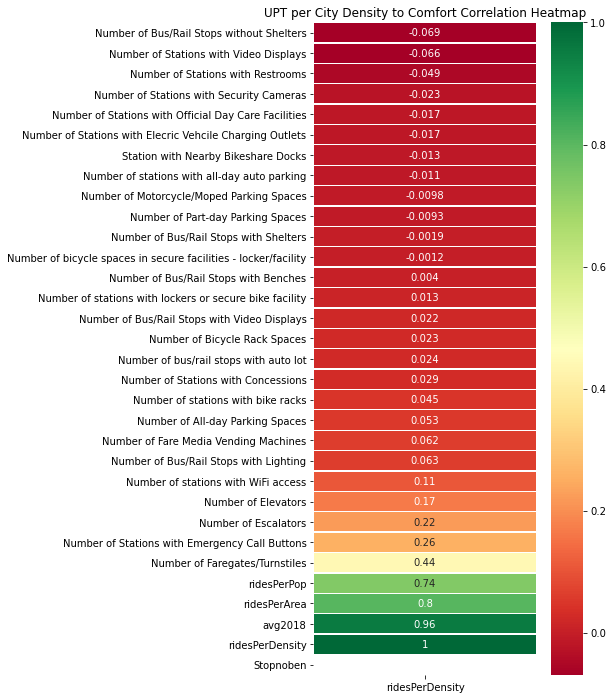

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
correlationDF2=comfortsUpt.corr()
correlationDF2Density=correlationDF2.iloc[:,-1:]
correlationDF2

riderCor2Density=correlationDF2Density

riderCor2Density=riderCor2Density.sort_values('ridesPerDensity')
fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(riderCor2Density, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per City Density to Comfort Correlation Heatmap')

[Text(0.5, 1.0, 'UPT per Population to Comfort Correlation Heatmap')]

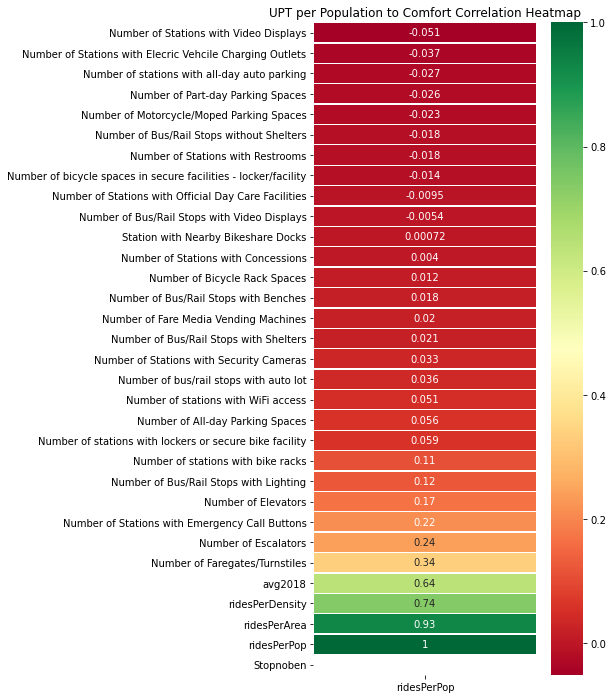

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
correlationDF2=comfortsUpt.corr()
correlationDF2Pop=correlationDF2.iloc[:,-3:-2]
correlationDF2

riderCor2Pop=correlationDF2Pop

riderCor2Pop=riderCor2Pop.sort_values('ridesPerPop')
fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(riderCor2Pop, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per Population to Comfort Correlation Heatmap')

[Text(0.5, 1.0, 'UPT per Population to Comfort Correlation Heatmap')]

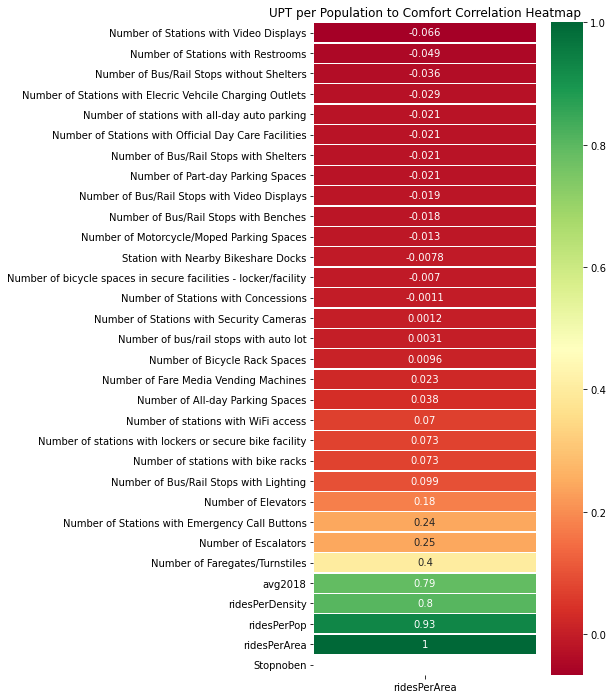

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
correlationDF2=comfortsUpt.corr()
correlationDF2Area=correlationDF2.iloc[:,-2:-1]
correlationDF2

riderCor2Area=correlationDF2Area

riderCor2Area=riderCor2Area.sort_values('ridesPerArea')
fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(riderCor2Area, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per Population to Comfort Correlation Heatmap')

[Text(0.5, 1.0, 'UPT per Population to Comfort Correlation Heatmap')]

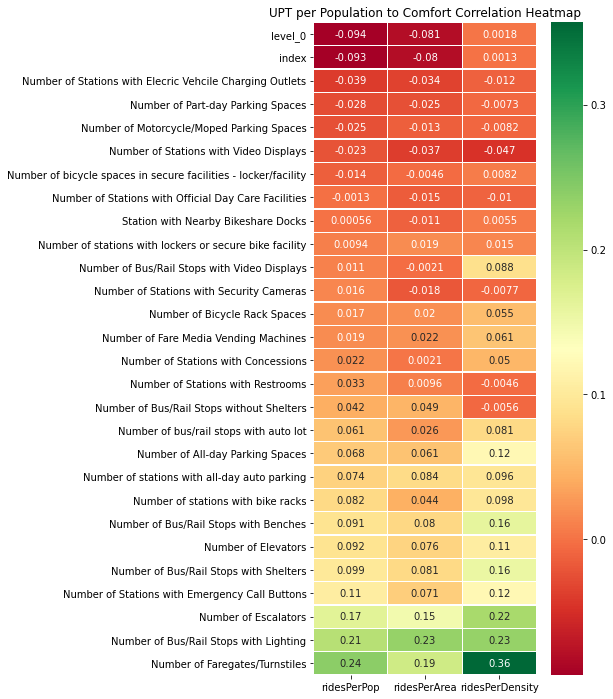

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns
correlationDF2=comfortsUpt.corr()
correlationDF2Area=correlationDF2.iloc[:,-3:]
correlationDF2

riderCor2Area=correlationDF2Area

riderCor2Area=riderCor2Area.dropna()
riderCor2Area=riderCor2Area.iloc[:-5,:]
riderCor2Area=riderCor2Area.sort_values('ridesPerPop')
fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(riderCor2Area, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per Population to Comfort Correlation Heatmap')

[Text(0.5, 1.0, 'UPT per Population to Comfort Correlation Heatmap')]

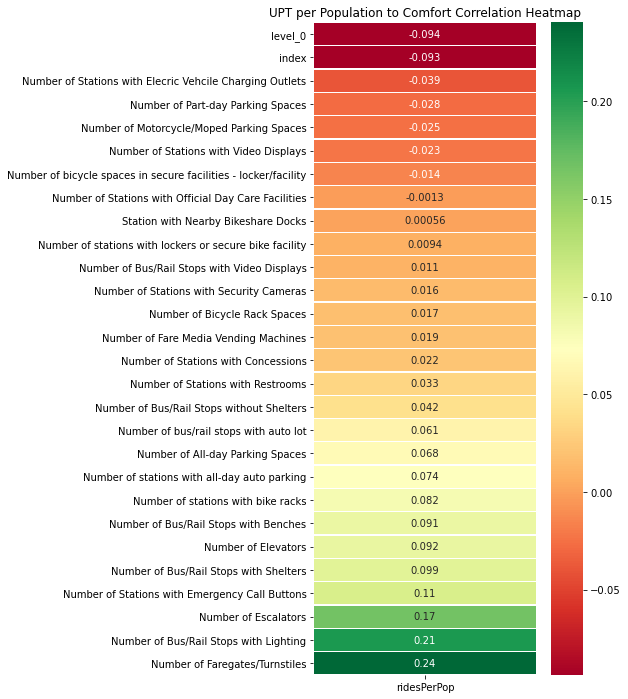

In [137]:
riderCor2Area=riderCor2Area.sort_values('ridesPerPop')
ridesPerPopClean=riderCor2Area.iloc[:,0].to_frame()
ridesPerPopClean

fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(ridesPerPopClean, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per Population to Comfort Correlation Heatmap')

[Text(0.5, 1.0, 'UPT per Population to Comfort Correlation Heatmap')]

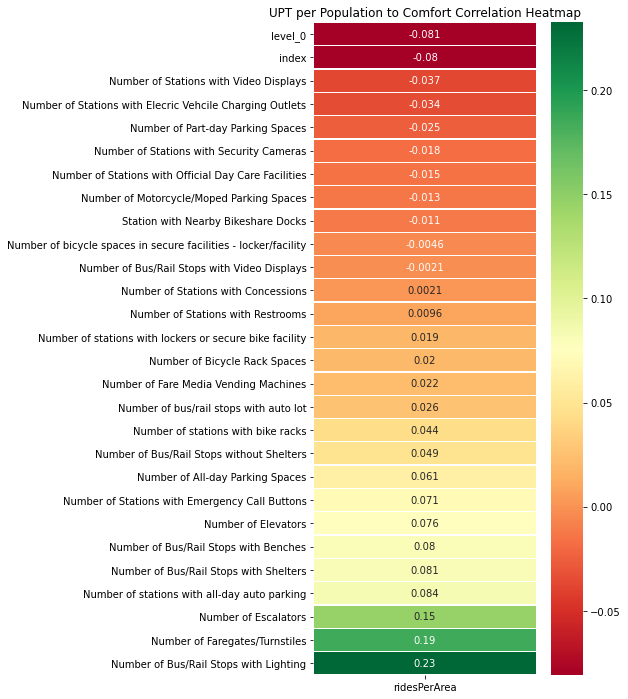

In [147]:
riderCor2Area=riderCor2Area.sort_values('ridesPerArea')
ridesPerPopClean=riderCor2Area.iloc[:,1].to_frame()
ridesPerPopClean

fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(ridesPerPopClean, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='UPT per Population to Comfort Correlation Heatmap')

In [88]:
comfortsUpt=comfortsUpt.dropna()
#comfortsUpt = comfortsUpt.reset_index()
#need to remove inf values to create random forest model
comfortsUpt=comfortsUpt.replace([np.inf, -np.inf], np.nan)
comfortsUpt

,level_0,index,Organization Name,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,Number of Stations with Concessions,Number of Stations with Restrooms,Number of Stations with Official Day Care Facilities,Number of Bus/Rail Stops with Shelters,...,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,avg2018,ridesPerPop,ridesPerArea,ridesPerDensity
0,0,0,Alameda-Contra Costa Transit District,0.0,0.0,0.0,0.0,0.000000,0.0,0.131166,...,0.0,0.000000,0.0,0.0,0.0,Alameda-Contra Costa Transit District,2.667770e+07,8.130442,50911.647901,4260.351551
2,2,3,City of Alexandria,0.0,0.0,0.0,0.0,0.000000,0.0,0.147163,...,0.0,0.000000,0.0,0.0,0.0,Alexandria Transit Company,1.962558e+06,8.185667,10901.603245,898.526954
4,4,5,Altoona Metro Transit,0.0,0.0,0.0,0.0,0.333333,0.0,0.048889,...,0.0,0.000000,0.0,0.0,0.0,Altoona Metro Transit,1.855337e+05,2.321202,5014.423423,85.884470
5,5,6,Ames Transit Agency,0.0,0.0,0.0,0.0,1.000000,0.0,0.081928,...,0.0,0.000000,0.0,0.0,0.0,Ames Transit Agency,2.153457e+06,35.630850,93628.579710,819.509558
6,6,7,Anaheim Transportation Network,1.0,1.0,1.0,1.0,1.000000,0.0,0.410959,...,1.0,1.000000,0.0,1.0,1.0,Anaheim Resort Transportation,1.632285e+06,0.134333,940.256144,233.202791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,304,Westchester County,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,...,0.0,0.000000,0.0,0.0,0.0,Westchester County Department of Transportation,1.154333e+07,0.629020,3345.893116,2170.118938
286,286,305,Westmoreland County,0.0,0.0,0.0,0.0,1.000000,0.0,0.093656,...,0.0,0.000000,0.0,0.0,0.0,Westmoreland County Transit Authority,2.540700e+05,0.146535,280.740331,132.614097
287,287,306,City of Williamsport,0.0,1.0,0.0,1.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.0,0.0,0.0,Williamsport Bureau of Transportation,3.286942e+05,5.854694,12173.861111,158.076747
288,288,307,City of Winston Salem,0.0,1.0,0.0,0.0,1.000000,0.0,0.080000,...,0.0,0.000000,0.0,0.0,0.0,Winston-Salem Transit Authority,4.369370e+05,1.117417,1352.746130,360.925803


In [118]:
comfortsUpt.iloc[:,3:-5]

,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,Number of Stations with Concessions,Number of Stations with Restrooms,Number of Stations with Official Day Care Facilities,Number of Bus/Rail Stops with Shelters,Number of Bus/Rail Stops with Benches,Number of Bus/Rail Stops with Lighting,Number of Bus/Rail Stops with Video Displays,...,Number of Motorcycle/Moped Parking Spaces,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.131166,0.268380,0.0000,0.022680,...,0.0,1.162351,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.147163,0.000000,0.0000,0.000000,...,0.0,0.859929,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.333333,0.0,0.048889,0.048889,0.0000,0.002222,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.000000,0.0,0.081928,0.060241,0.0000,0.000000,...,0.0,0.833735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,1.000000,0.0,0.410959,0.568493,0.0000,0.157534,...,0.0,0.000000,0.0,0.0,1.0,1.0,1.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.000000,0.0000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
286,0.0,0.0,0.0,0.0,1.000000,0.0,0.093656,0.000000,0.0000,0.000000,...,0.0,0.906344,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
287,0.0,1.0,0.0,1.0,1.000000,0.0,1.000000,0.000000,0.0000,0.000000,...,2.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
288,0.0,1.0,0.0,0.0,1.000000,0.0,0.080000,0.000000,0.0000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [100]:
# Random Forest for ridership
ridesPerPop = np.array(comfortsUpt['ridesPerPop'])
ridesPerArea =np.array(comfortsUpt['ridesPerArea'])
ridesPerDensity=np.array(comfortsUpt['ridesPerDensity'])

RF_df = comfortsUpt.iloc[:,3:-5]

feature_list = list(RF_df.columns)

features = np.array(RF_df)


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [102]:
train_features, test_features, train_ridesPerPop, test_ridesPerPop, train_ridesPerArea, test_ridesPerArea, train_ridesPerDensity, train_ridesPerDensity = train_test_split(features, ridesPerPop, ridesPerArea, ridesPerDensity, test_size = 0.25, random_state = 11)
popModel = RandomForestRegressor(n_estimators = 1000, random_state = 11)
popModel.fit(train_features, train_ridesPerPop)

areaModel = RandomForestRegressor(n_estimators = 1000, random_state = 11)
areaModel.fit(train_features, train_ridesPerArea)

densityModel = RandomForestRegressor(n_estimators = 1000, random_state = 11)
#densityModel.fit(train_features, train_ridesPerDensity)

In [104]:
import math

# Population Model

Root mean square Error: 11.478240283248997 trips


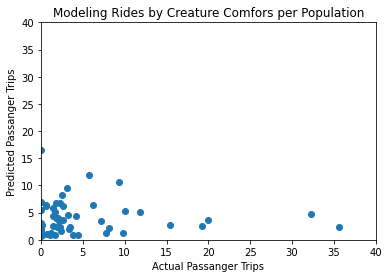

In [140]:
popPredictions = popModel.predict(test_features)
popErrors = (abs(popPredictions - test_ridesPerPop)*abs(popPredictions - test_ridesPerPop))


plt.scatter(test_ridesPerPop, popPredictions)
plt.xlabel("Actual Passanger Trips")
plt.ylabel("Predicted Passanger Trips")
#plt.yscale(value = "log")
plt.ylim([0,40])
plt.xlim([0,40])
#plt.xscale(value = "log")
plt.title('Modeling Rides by Creature Comfors per Population')

print('Root mean square Error:', math.sqrt(round(np.mean(popErrors), 2)), 'trips')

# Area Model

In [ ]:
#comfortsUpt.to_csv('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/final_project/data/comfots_csv')

Root mean square Error: 30531.928434345577 trips


Text(0.5, 1.0, 'Modeling Rides by Creature Comfors per Service Area')

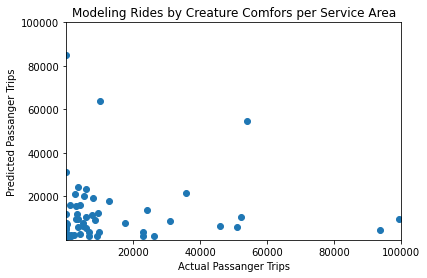

In [141]:
areaPredictions = areaModel.predict(test_features)
areaErrors = (abs(areaPredictions - test_ridesPerArea))*(abs(areaPredictions - test_ridesPerArea))

print('Root mean square Error:', math.sqrt(round(np.mean(areaErrors), 2)), 'trips')

plt.scatter(test_ridesPerArea, areaPredictions)
plt.xlabel("Actual Passanger Trips")
plt.ylabel("Predicted Passanger Trips")
#plt.yscale(value = "log")
#plt.xscale(value = "log")
plt.xlim([10,100000])
plt.ylim([10,100000])

plt.title('Modeling Rides by Creature Comfors per Service Area')


# Density Model

In [117]:
#densityPredictions = densityModel.predict(test_features)
#densityErrors = abs(densityPredictions - test_ridesPerDensity)

#print('Root mean square Error:', math.sqrt(round(np.mean(densityErrors), 2)), 'trips')

#plt.scatter(test_ridesPerDensity, densityPredictions)
#plt.xlabel("Actual Passanger Trips")
#plt.ylabel("Predicted Passanger Trips")
#plt.yscale(value = "log")
#plt.xscale(value = "log")
#plt.ylim([10,100000])
#plt.xlim([10,100000])

In [ ]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
RF_df
popModel = RandomForestRegressor(n_estimators = 1000, random_state = 11)
popModel.fit(train_features, train_ridesPerPop)

# specify a simple model with bobblehead entered last
model2 = str("""TotalPay ~ SRS + OppPointsPerGame   + Losses   + Rank+ PointsPerGame+ turitionRevenueperStud + GSR +
              percentWhite + percentBlack + facultySalary + TotalYards + OppYards + DefSRS + Wins""")

# fit the model to the training set
train_model_fit2 = smf.ols(model2, data = train_features).fit()
# summary of model fit to the training set
print(train_model_fit2.summary())
# training set predictions from the model fit to the training set
train_features['predict2'] = train_model_fit2.fittedvalues

# test set predictions from the model fit to the training set
coachSchoolAcad_test['predict2'] = train_model_fit2.predict(coachSchoolAcad_test)

In [148]:
# Get numerical feature importances

importances = list(popModel.feature_importances_)

# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Number of Bus/Rail Stops with Lighting Importance: 0.16
Variable: Number of Bus/Rail Stops without Shelters Importance: 0.11
Variable: Number of Bus/Rail Stops with Shelters Importance: 0.09
Variable: Number of Bus/Rail Stops with Video Displays Importance: 0.07
Variable: Number of Bus/Rail Stops with Benches Importance: 0.06
Variable: Number of All-day Parking Spaces Importance: 0.06
Variable: Number of Stations with Restrooms Importance: 0.05
Variable: Number of Elevators  Importance: 0.05
Variable: Number of Escalators Importance: 0.05
Variable: Number of Bicycle Rack Spaces Importance: 0.05
Variable: Number of Stations with Security Cameras Importance: 0.04
Variable: Number of Stations with Video Displays Importance: 0.03
Variable: Number of bus/rail stops with auto lot Importance: 0.03
Variable: Number of Fare Media Vending Machines Importance: 0.03
Variable: Number of Stations with Concessions Importance: 0.02
Variable: Number of stations with all-day auto parking Impor

In [149]:
# Get numerical feature importances

importances = list(areaModel.feature_importances_)

# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Number of Bus/Rail Stops with Lighting Importance: 0.21
Variable: Number of Bus/Rail Stops with Shelters Importance: 0.13
Variable: Number of Bus/Rail Stops without Shelters Importance: 0.11
Variable: Number of Bus/Rail Stops with Video Displays Importance: 0.07
Variable: Number of All-day Parking Spaces Importance: 0.07
Variable: Number of Bus/Rail Stops with Benches Importance: 0.05
Variable: Number of Elevators  Importance: 0.05
Variable: Number of Stations with Security Cameras Importance: 0.04
Variable: Number of Escalators Importance: 0.04
Variable: Number of Bicycle Rack Spaces Importance: 0.04
Variable: Number of Stations with Video Displays Importance: 0.03
Variable: Number of Stations with Restrooms Importance: 0.03
Variable: Number of Fare Media Vending Machines Importance: 0.03
Variable: Number of Stations with Concessions Importance: 0.02
Variable: Number of stations with all-day auto parking Importance: 0.02
Variable: Number of Stations with Emergency Call Butto